In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from tqdm import trange
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("customer_dataframe.csv", sep="\t", index_col=0)
df.head()

,TProd,DProd,MaxPO,MinPO,MeanProdOrder,TSale,MinPSale,MaxPSale,MeanSaleOrder,TRProd,MeanPSale,TOrder,SETSaleQta,SESaleQtaOrder
CustomerID,,,,,,,,,,,,,,
17850,1702,21,141,12,48.629,5317.89,6.36,107.25,151.940,31,3.960,34,4.137,3.186
13047,1355,105,309,3,84.688,3089.10,6.64,68.00,193.069,35,3.926,9,5.421,3.875
12583,4978,114,714,100,292.824,6629.34,6.80,132.80,389.961,50,2.140,15,5.804,4.087
13748,439,24,208,8,87.800,948.25,9.36,204.00,189.650,0,3.996,5,4.080,2.322
15100,58,1,32,16,9.667,635.10,175.20,350.40,105.850,22,10.950,3,2.252,2.252


In [3]:
df_aux = df[['TProd', 'MeanProdOrder', 'MeanSaleOrder', 'MeanPSale']]
df_aux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4333 entries, 17850 to 12713
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TProd          4333 non-null   int64  
 1   MeanProdOrder  4333 non-null   float64
 2   MeanSaleOrder  4333 non-null   float64
 3   MeanPSale      4333 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 169.3 KB


In [4]:
df_aux

,TProd,MeanProdOrder,MeanSaleOrder,MeanPSale
CustomerID,,,,
17850,1702,48.629,151.940,3.960
13047,1355,84.688,193.069,3.926
12583,4978,292.824,389.961,2.140
13748,439,87.800,189.650,3.996
15100,58,9.667,105.850,10.950
...,...,...,...,...
13436,76,76.000,196.890,5.830
15520,314,314.000,343.500,1.724
13298,96,96.000,360.000,3.750


In [5]:
df_aux.describe()

,TProd,MeanProdOrder,MeanSaleOrder,MeanPSale
count,4333.000000,4333.000000,4333.000000,4333.000000
mean,1129.535657,201.104614,327.882896,3.492819
std,4692.695935,274.590134,395.336014,8.997404
min,0.000000,0.000000,-0.000000,0.122000
25%,157.000000,80.500000,155.050000,2.160000
50%,370.000000,140.167000,241.900000,2.834000
75%,971.000000,237.750000,371.560000,3.712000
max,196556.000000,7824.000000,9904.875000,434.650000


In [6]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_aux.values)
X

array([[0.00865911, 0.00621536, 0.01533992, 0.00883257],
       [0.00689371, 0.01082413, 0.01949232, 0.00875433],
       [0.02532612, 0.03742638, 0.03937061, 0.00464412],
       ...,
       [0.00048841, 0.01226994, 0.03634574, 0.00834929],
       [0.00040192, 0.01009714, 0.02295738, 0.00874052],
       [0.00256924, 0.06454499, 0.08021807, 0.00451755]])

# GENETIC ALGORITHM

In [7]:
from pyclustering.cluster.ga import genetic_algorithm, ga_observer, ga_visualizer
from pyclustering.cluster import cluster_visualizer, cluster_visualizer_multidim

In [8]:
# # Read data for clustering
# sample = X

# # Create instance of observer that will collect all information:
# observer_instance = ga_observer(True, True, True)

# # Create genetic algorithm where observer will collect information:
# ga_instance = genetic_algorithm(data=sample,
#                                 count_clusters=3,
#                                 chromosome_count=100,
#                                 population_count=10,
#                                 count_mutation_gens=1,
#                                 observer=observer_instance)

# # Start processing
# ga_instance.process()

# # Obtain results
# clusters = ga_instance.get_clusters()

# # Print cluster to console
# #print("Amount of clusters: '%d'. Clusters: '%s'" % (len(clusters), clusters))
# print([len(c) for c in clusters])
# print(clusters)
# print("Silhouette score: ", silhouette_score(X, clusters))

# # Show cluster using observer:
# ga_visualizer.show_clusters(sample, observer_instance)

In [9]:
# clusters_df = {}
# indexes = df.index
# for i in range(len(clusters)):
#     clusters_df[i] = df[df.index.isin([indexes[i] for i in clusters[i]])]

In [10]:
# attr = df_aux.columns
# clusters = [i for i in clusters_df]
# fig, axs = plt.subplots(len(attr),3,figsize=(15,15))
# for attr_index in range(len(attr)):
#     mean_values = []
#     max_values = []
#     min_values = []
#     for _, cluster_df in clusters_df.items():
#         mean_values.append(cluster_df.describe()[attr[attr_index]][1])
#         max_values.append(cluster_df.describe()[attr[attr_index]][7])
#         min_values.append(cluster_df.describe()[attr[attr_index]][3])
#     axs[attr_index][0].bar(clusters, mean_values)
#     axs[attr_index][0].set_title(f"{attr[attr_index]} - Mean")
#     axs[attr_index][1].bar(clusters, max_values)
#     axs[attr_index][1].set_title(f"{attr[attr_index]} - Max")
#     axs[attr_index][2].bar(clusters, min_values)
#     axs[attr_index][2].set_title(f"{attr[attr_index]} - Min")

In [11]:
def ga_cluster(sample, nc, cc, pc, mg):
    observer_instance = ga_observer(True, True, True)
    ga_instance = genetic_algorithm(data=sample, count_clusters=nc, chromosome_count=cc, population_count=pc,count_mutation_gens=mg,observer=observer_instance)
    ga_instance.process()
    clusters = ga_instance.get_clusters()
    print([len(c) for c in clusters])    
    clusters_df = {}
    indexes = df.index
    for i in range(len(clusters)):
        clusters_df[i] = df[df.index.isin([indexes[i] for i in clusters[i]])]
    attr = df_aux.columns
    mean_values_to_plot= {a:[] for a in attr}
    to_plot = [[x[1],x[2]] for x in sample]
    for attr_index in range(len(attr)):
        mean_values = []
        for _, cluster_df in clusters_df.items():
            mean_values.append(cluster_df.describe()[attr[attr_index]][1])
        mean_values_to_plot[attr[attr_index]] = mean_values
    ga_visualizer.show_clusters(to_plot, observer_instance)
    
    return mean_values_to_plot, clusters

In [12]:
def calc_silhouette(data, clusters):
    cust_clust = {}
    for i in range(len(clusters)):
        for customer in clusters[i]:
            cust_clust[customer] = i
    clustering = []
    for cust in sorted(cust_clust):
        clustering.append(cust_clust[cust])
    print("Silhouette score: ", silhouette_score(data, clustering))
    return clustering

[1465, 1406, 1462]


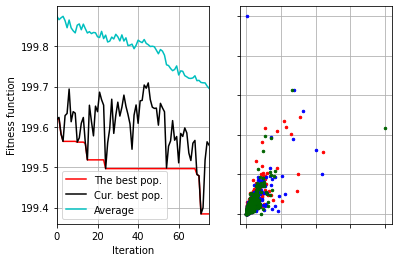

Silhouette score:  -0.025481881033576088
[1447, 1423, 1463]


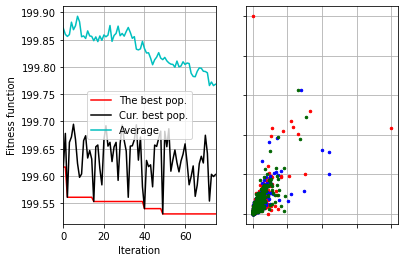

Silhouette score:  -0.02809932851131061
[1421, 1440, 1472]


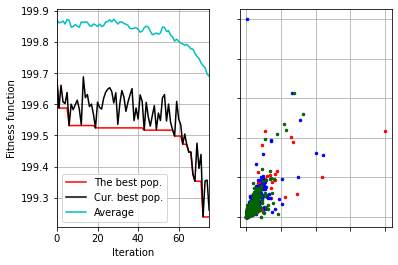

Silhouette score:  -0.033884845274314575
[1471, 1458, 1404]


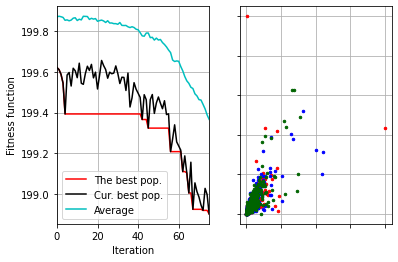

Silhouette score:  -0.029873023241784417


In [14]:
nc = 3
pc = 75
cc_l = [100, 200]
mg_l = [1, 3]
means = []
for cc in cc_l:
    for mg in mg_l:
        mv, cl = ga_cluster(X, nc, cc, pc, mg)
        means.append(mv)
        calc_silhouette(X, cl)

In [15]:
means

[{'TProd': [1149.6341296928329, 1232.423186344239, 1010.4493844049248],
  'MeanProdOrder': [205.19793105802052,
   211.78469985775249,
   186.73189945280438],
  'MeanSaleOrder': [343.7515604095563, 332.33261877667144, 307.70238645690836],
  'MeanPSale': [3.4180170648464165, 3.4968022759601705, 3.563943912448701]},
 {'TProd': [1082.6316516931583, 1146.5467322557977, 1159.3807245386192],
  'MeanProdOrder': [210.63497442985488,
   191.34722136331692,
   201.16909774436093],
  'MeanSaleOrder': [345.28191292328955, 305.4618559381588, 332.4821859193438],
  'MeanPSale': [3.6541838286109187, 3.464117357695011, 3.3611360218728645]},
 {'TProd': [1077.4862772695285, 1196.0444444444445, 1114.71875],
  'MeanProdOrder': [188.16710767065447,
   217.14381388888884,
   197.90335733695653],
  'MeanSaleOrder': [305.4155869106263, 355.42977847222215, 322.62374796195655],
  'MeanPSale': [3.704225897255454, 3.372543055555556, 3.406398097826087]},
 {'TProd': [949.4017675050985, 1349.3765432098764, 1089.96937